# LIBRARY

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

# Dataset

In [154]:
dt = pd.read_csv('final_dataset_v2_no_NA.csv')

In [155]:
df = dt.copy()
df.head()

,Unnamed: 0,area_name,property_id,property_name,property_bedrooms,property_type,unit_id,unit_name,unit_type,bedroom,...,tv,ac,parking,pool,breakfast,building_staff,status,price_per_unit,total_bookings,overall_rating
0,0,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1395,Room 1,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.170735e+06,138.0,4.702576
1,1,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1396,Room 2,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.201892e+06,143.0,4.824885
2,2,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1397,Room 3,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1,1.237458e+06,147.0,4.674419
3,3,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1398,Room 4,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.195869e+06,130.0,4.810275
4,4,Bingin,PR0057,Teges Asri,7,Guesthouse,UN1399,Room 5,Standard,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.189912e+06,130.0,4.794189


# EDA & Preprocessing

In [156]:
area_name = df['area_name']
property_type = df['property_type']
unit = df['unit_type']

In [157]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['area_name'] = label_encoder.fit_transform(df['area_name'])
# df['unit_id'] = df['unit_id'].str[2:].astype(int)
df['property_type'] = label_encoder.fit_transform(df['property_type'])
df['property_name'] = label_encoder.fit_transform(df['property_name'])
df['unit_type'] = label_encoder.fit_transform(df['unit_type'])
df = df.drop(columns=['Unnamed: 0'])
df

,area_name,property_id,property_name,property_bedrooms,property_type,unit_id,unit_name,unit_type,bedroom,bathroom,...,tv,ac,parking,pool,breakfast,building_staff,status,price_per_unit,total_bookings,overall_rating
0,0,PR0057,62,7,0,UN1395,Room 1,74,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.170735e+06,138.0,4.702576
1,0,PR0057,62,7,0,UN1396,Room 2,74,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.201892e+06,143.0,4.824885
2,0,PR0057,62,7,0,UN1397,Room 3,74,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1,1.237458e+06,147.0,4.674419
3,0,PR0057,62,7,0,UN1398,Room 4,74,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.195869e+06,130.0,4.810275
4,0,PR0057,62,7,0,UN1399,Room 5,74,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1,1.189912e+06,130.0,4.794189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,21,PR0765,23,2,4,UN2884,Istana Dalton - Entire Villa,40,2.0,2.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1,1.160921e+06,86.0,4.757937
327,21,PR0093,81,4,4,UN1223,Istana Willy - Entire Villa,96,2.0,2.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1,1.185920e+06,52.0,4.559767
328,21,PR0557,9,4,4,UN2786,Villa 1,95,4.0,4.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1,1.941470e+06,148.0,4.756757
329,21,PR0417,45,3,4,UN2355,NH Residence 3A,9,3.0,3.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1,1.456936e+06,91.0,4.423888


In [158]:
df = df[['area_name', 'property_name', 'property_type','property_bedrooms', 'unit_type', 'bedroom',
       'bathroom', 'beds', 'wifi', 'tv', 'ac',
       'parking', 'pool', 'breakfast','building_staff',
       'price_per_unit', 'total_bookings','overall_rating']]
df.head()

,area_name,property_name,property_type,property_bedrooms,unit_type,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff,price_per_unit,total_bookings,overall_rating
0,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.170735e+06,138.0,4.702576
1,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.201892e+06,143.0,4.824885
2,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.237458e+06,147.0,4.674419
3,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.195869e+06,130.0,4.810275
4,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.189912e+06,130.0,4.794189


In [159]:
df.describe()

,area_name,property_name,property_type,property_bedrooms,unit_type,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff,price_per_unit,total_bookings,overall_rating
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,3.310000e+02,331.000000,331.000000
mean,9.293051,41.474320,1.135952,9.821752,52.803625,1.283988,1.317221,1.314199,0.981873,0.465257,0.945619,0.927492,0.691843,0.175227,0.468278,9.000158e+05,97.915408,4.643519
std,7.545132,28.992921,1.692123,13.022182,28.119347,0.733000,0.855803,0.757434,0.133612,0.499547,0.227111,0.259719,0.462431,0.380736,0.499748,6.915879e+05,57.926119,0.211709
min,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.642067e+05,3.000000,3.571429
25%,1.000000,13.500000,0.000000,4.000000,31.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.013948e+05,51.000000,4.527056
50%,9.000000,37.000000,0.000000,6.000000,55.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.809707e+05,93.000000,4.670330
75%,19.000000,64.000000,3.000000,10.000000,74.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.055762e+06,140.500000,4.792980
max,21.000000,97.000000,4.000000,50.000000,107.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.143933e+06,338.000000,5.000000


0 : 'Guesthouse',
4 : 'Villa',
1 : 'Hostel',
3 : 'Resort',
2 : 'House'

In [ ]:
sns.pairplot(df, hue='property_type')

KeyboardInterrupt: 

In [ ]:
sns.pairplot(df)

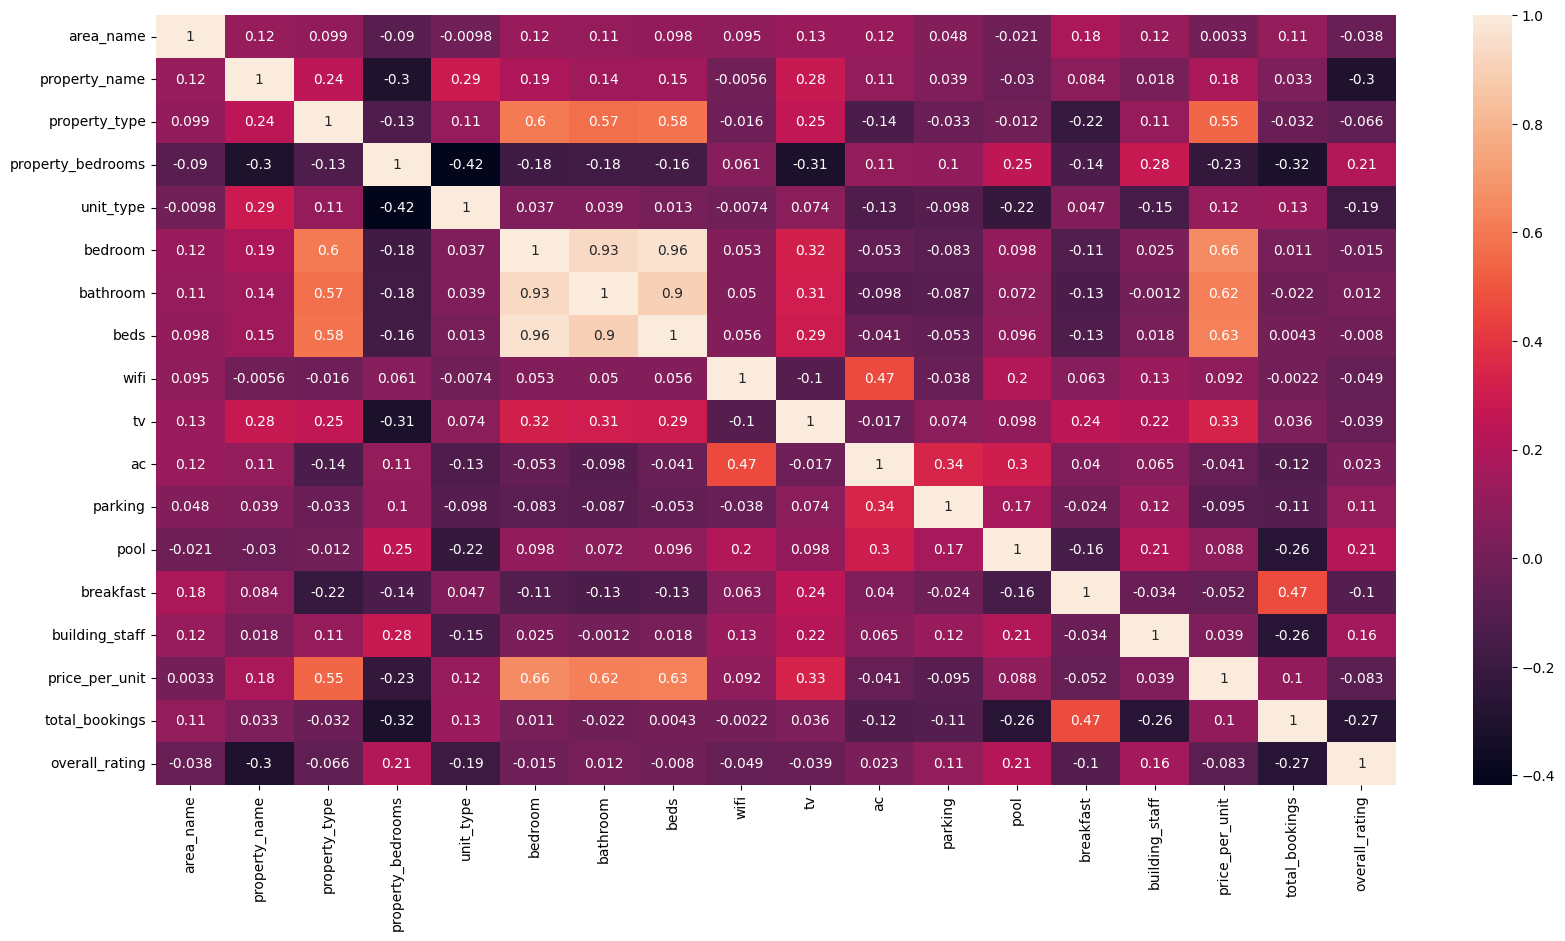

In [160]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
'''
df['price_per_unit'] = (df['price_per_unit']  - df['price_per_unit'].min())/(df['price_per_unit'].max() - df['price_per_unit'].min())
df['total_bookings'] = (df['total_bookings']  - df['total_bookings'].min())/(df['total_bookings'].max() - df['total_bookings'].min())
df['overall_rating'] = (df['overall_rating']  - df['overall_rating'].min())/(df['overall_rating'].max() - df['overall_rating'].min())

df['bedroom'] = (df['bedroom']  - df['bedroom'].min())/(df['bedroom'].max() - df['bedroom'].min())
df['bathroom'] = (df['bathroom']  - df['bathroom'].min())/(df['bathroom'].max() - df['bathroom'].min())
df['beds'] = (df['beds']  - df['beds'].min())/(df['beds'].max() - df['beds'].min())

df['area_name'] = (df['area_name']  - df['area_name'].min())/(df['area_name'].max() - df['area_name'].min())
df['property_type'] = (df['property_type']  - df['property_type'].min())/(df['property_type'].max() - df['property_type'].min())
df['unit_type'] = (df['unit_type']  - df['unit_type'].min())/(df['unit_type'].max() - df['unit_type'].min())
df['property_name'] = (df['property_name']  - df['property_name'].min())/(df['property_name'].max() - df['property_name'].min())
df['property_bedrooms'] = (df['property_bedrooms']  - df['property_bedrooms'].min())/(df['property_bedrooms'].max() - df['property_bedrooms'].min())
'''

"\ndf['price_per_unit'] = (df['price_per_unit']  - df['price_per_unit'].min())/(df['price_per_unit'].max() - df['price_per_unit'].min())\ndf['total_bookings'] = (df['total_bookings']  - df['total_bookings'].min())/(df['total_bookings'].max() - df['total_bookings'].min())\ndf['overall_rating'] = (df['overall_rating']  - df['overall_rating'].min())/(df['overall_rating'].max() - df['overall_rating'].min())\n\ndf['bedroom'] = (df['bedroom']  - df['bedroom'].min())/(df['bedroom'].max() - df['bedroom'].min())\ndf['bathroom'] = (df['bathroom']  - df['bathroom'].min())/(df['bathroom'].max() - df['bathroom'].min())\ndf['beds'] = (df['beds']  - df['beds'].min())/(df['beds'].max() - df['beds'].min())\n\ndf['area_name'] = (df['area_name']  - df['area_name'].min())/(df['area_name'].max() - df['area_name'].min())\ndf['property_type'] = (df['property_type']  - df['property_type'].min())/(df['property_type'].max() - df['property_type'].min())\ndf['unit_type'] = (df['unit_type']  - df['unit_type'].min(

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_name          331 non-null    int64  
 1   property_name      331 non-null    int64  
 2   property_type      331 non-null    int64  
 3   property_bedrooms  331 non-null    int64  
 4   unit_type          331 non-null    int64  
 5   bedroom            331 non-null    float64
 6   bathroom           331 non-null    float64
 7   beds               331 non-null    float64
 8   wifi               331 non-null    float64
 9   tv                 331 non-null    float64
 10  ac                 331 non-null    float64
 11  parking            331 non-null    float64
 12  pool               331 non-null    float64
 13  breakfast          331 non-null    float64
 14  building_staff     331 non-null    float64
 15  price_per_unit     331 non-null    float64
 16  total_bookings     331 non

In [171]:
df

,area_name,property_name,property_type,property_bedrooms,unit_type,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff,price_per_unit,total_bookings,overall_rating
0,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.170735e+06,138.0,4.702576
1,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.201892e+06,143.0,4.824885
2,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.237458e+06,147.0,4.674419
3,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.195869e+06,130.0,4.810275
4,0,62,0,7,74,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.189912e+06,130.0,4.794189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,21,23,4,2,40,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.160921e+06,86.0,4.757937
327,21,81,4,4,96,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.185920e+06,52.0,4.559767
328,21,9,4,4,95,4.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.941470e+06,148.0,4.756757
329,21,45,4,3,9,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.456936e+06,91.0,4.423888


### Scalling data

In [172]:
from sklearn.preprocessing import StandardScaler
df2 = df.drop(columns=['property_name', 'property_bedrooms', 'total_bookings', 'unit_type'])
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_name       331 non-null    int64  
 1   property_type   331 non-null    int64  
 2   bedroom         331 non-null    float64
 3   bathroom        331 non-null    float64
 4   beds            331 non-null    float64
 5   wifi            331 non-null    float64
 6   tv              331 non-null    float64
 7   ac              331 non-null    float64
 8   parking         331 non-null    float64
 9   pool            331 non-null    float64
 10  breakfast       331 non-null    float64
 11  building_staff  331 non-null    float64
 12  price_per_unit  331 non-null    float64
 13  overall_rating  331 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 36.3 KB


,area_name,property_type,bedroom,bathroom,beds,wifi,tv,ac,parking,pool,breakfast,building_staff,price_per_unit,overall_rating
0,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.170735e+06,4.702576
1,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.201892e+06,4.824885
2,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.237458e+06,4.674419
3,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.195869e+06,4.810275
4,0,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.189912e+06,4.794189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,21,4,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.160921e+06,4.757937
327,21,4,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.185920e+06,4.559767
328,21,4,4.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.941470e+06,4.756757
329,21,4,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.456936e+06,4.423888


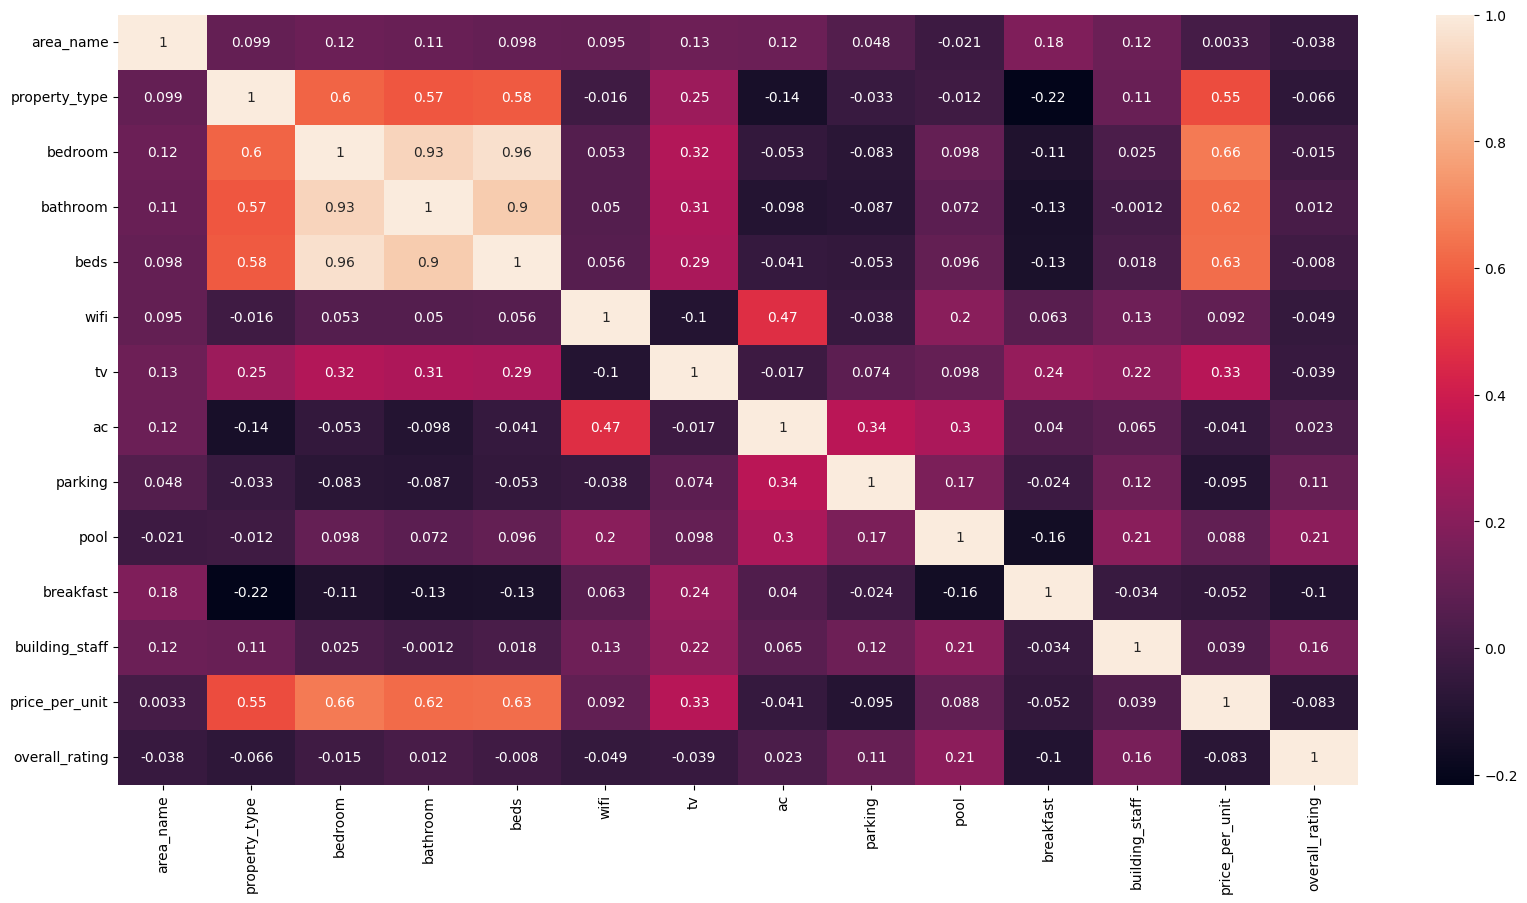

In [173]:
plt.figure(figsize = (20,10))
sns.heatmap(df2.corr(),annot = True)
plt.show()

In [174]:
standard_scaler = StandardScaler()
df2_scaled = standard_scaler.fit_transform(df2)

In [ ]:
'''from sklearn.preprocessing import Normalizer
normal_values = Normalizer().fit_transform(df.values)
print(normal_values)'''

'from sklearn.preprocessing import Normalizer\nnormal_values = Normalizer().fit_transform(df.values)\nprint(normal_values)'

# PCA

In [165]:
from sklearn.decomposition import PCA

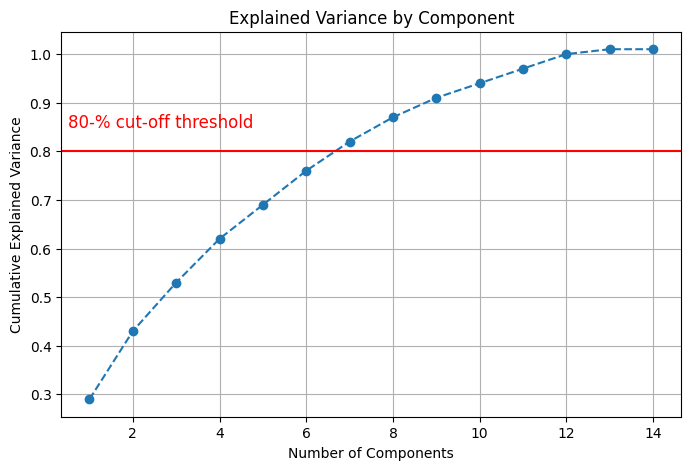

Number of components explaining 80% of the variance: 7


In [176]:
pca = PCA().fit(df2_scaled)

# Explained Variance Ratio
explained_variance_ratio = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 2))

# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Component')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80-% cut-off threshold', color='red', fontsize=12)
plt.grid(True)
plt.show()

# Menentukan jumlah komponen yang menjelaskan setidaknya 95% dari varians
n_components = np.argmax(explained_variance_ratio >= 0.8) + 1
print(f'Number of components explaining 80% of the variance: {n_components}')

In [177]:
pca = PCA(n_components = 7)
scores_pca = pca.fit_transform(df2_scaled)

In [178]:
colnames = list(df2.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4], 'PC6':pca.components_[5], 'PC7':pca.components_[6]}) #,'PC7':pca.components_[6], 'PC8':pca.components_[7], 'PC9':pca.components_[8]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,area_name,0.066949,-0.160192,0.436964,0.083605,0.089758,0.747823,-0.137731
1,property_type,0.366423,0.063540,-0.061186,0.050215,-0.015772,0.184624,0.323102
2,bedroom,0.474476,0.002657,-0.016543,-0.065461,-0.043717,0.031669,-0.142674
3,bathroom,0.459241,0.026441,-0.035872,-0.058813,-0.035548,0.045810,-0.172433
4,beds,0.463592,-0.004432,-0.036792,-0.072866,-0.069962,0.035056,-0.145662
5,wifi,0.027441,-0.413091,0.135973,-0.522438,0.338559,-0.051030,0.048977
6,tv,0.213011,-0.085277,0.350601,0.460113,-0.045863,-0.379539,0.082985
7,ac,-0.044886,-0.558271,0.097368,-0.295367,-0.246280,-0.026521,-0.022343
8,parking,-0.044305,-0.361631,-0.051074,0.264835,-0.714204,0.121983,0.117570
9,pool,0.057133,-0.461431,-0.269617,0.061192,0.105592,-0.283831,-0.079426


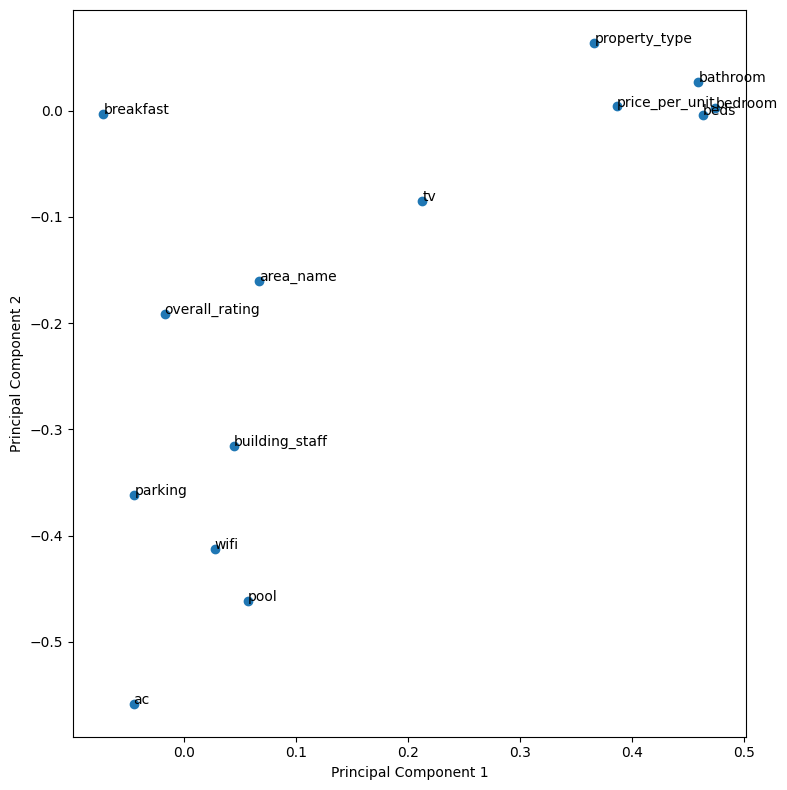

In [179]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

### Analyzing PCA Loading

In [180]:
#df3 = df.drop(columns=['property_name', 'property_bedrooms', 'total_bookings', 'unit_type', 'building_staff'])
df3 = df2.copy()

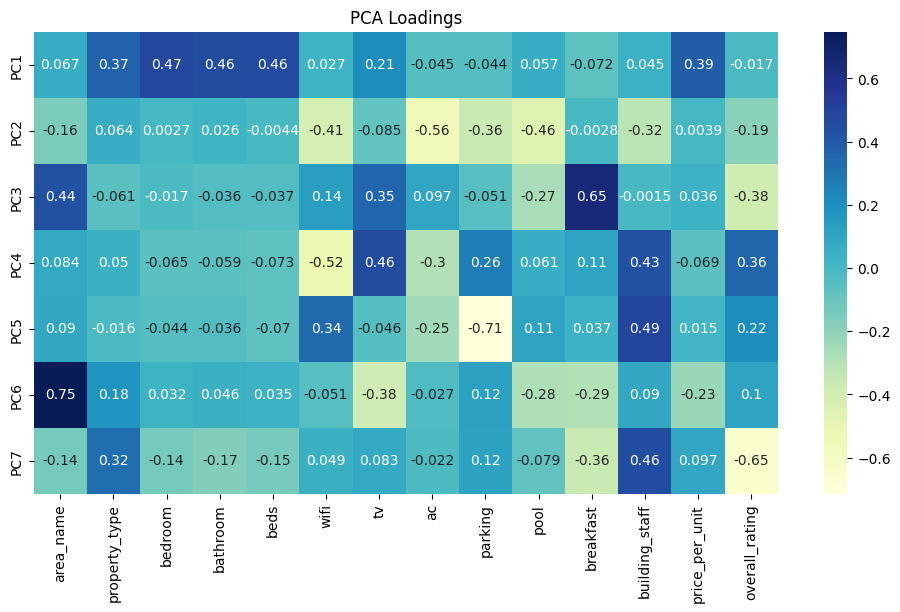

In [182]:
pca_components = pca.components_
pca_loadings_df = pd.DataFrame(pca_components, columns=df3.columns, index=[f'PC{i+1}' for i in range(7)])

# Display the loadings
pca_loadings_df

# Heatmap of the loadings
plt.figure(figsize=(12, 6))
sns.heatmap(pca_loadings_df, cmap="YlGnBu", annot=True)
plt.title('PCA Loadings')
plt.show()

In [185]:
# Extract the absolute values of the PCA loadings
pca_loadings_analysis = pd.DataFrame(
    np.abs(pca.components_),
    columns=df3.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components)]
)

# Identify the top contributing features for each principal component
top_features_per_pc7 = pca_loadings_analysis.apply(lambda s: s.nlargest(14).index.tolist(), axis=1)

# Display the top contributing features for each principal component
pd.DataFrame(top_features_per_pc7)

,0
PC1,"[bedroom, beds, bathroom, price_per_unit, prop..."
PC2,"[ac, pool, wifi, parking, building_staff, over..."
PC3,"[breakfast, area_name, overall_rating, tv, poo..."
PC4,"[wifi, tv, building_staff, overall_rating, ac,..."
PC5,"[parking, building_staff, wifi, ac, overall_ra..."
PC6,"[area_name, tv, breakfast, pool, price_per_uni..."
PC7,"[overall_rating, building_staff, breakfast, pr..."


No charts were generated by quickchart


# Hierarchical

In [186]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [187]:
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,area_name,0.066949,-0.160192,0.436964,0.083605,0.089758,0.747823,-0.137731
1,property_type,0.366423,0.063540,-0.061186,0.050215,-0.015772,0.184624,0.323102
2,bedroom,0.474476,0.002657,-0.016543,-0.065461,-0.043717,0.031669,-0.142674
3,bathroom,0.459241,0.026441,-0.035872,-0.058813,-0.035548,0.045810,-0.172433
4,beds,0.463592,-0.004432,-0.036792,-0.072866,-0.069962,0.035056,-0.145662
5,wifi,0.027441,-0.413091,0.135973,-0.522438,0.338559,-0.051030,0.048977
6,tv,0.213011,-0.085277,0.350601,0.460113,-0.045863,-0.379539,0.082985
7,ac,-0.044886,-0.558271,0.097368,-0.295367,-0.246280,-0.026521,-0.022343
8,parking,-0.044305,-0.361631,-0.051074,0.264835,-0.714204,0.121983,0.117570
9,pool,0.057133,-0.461431,-0.269617,0.061192,0.105592,-0.283831,-0.079426


## Linkage

## remove outlier

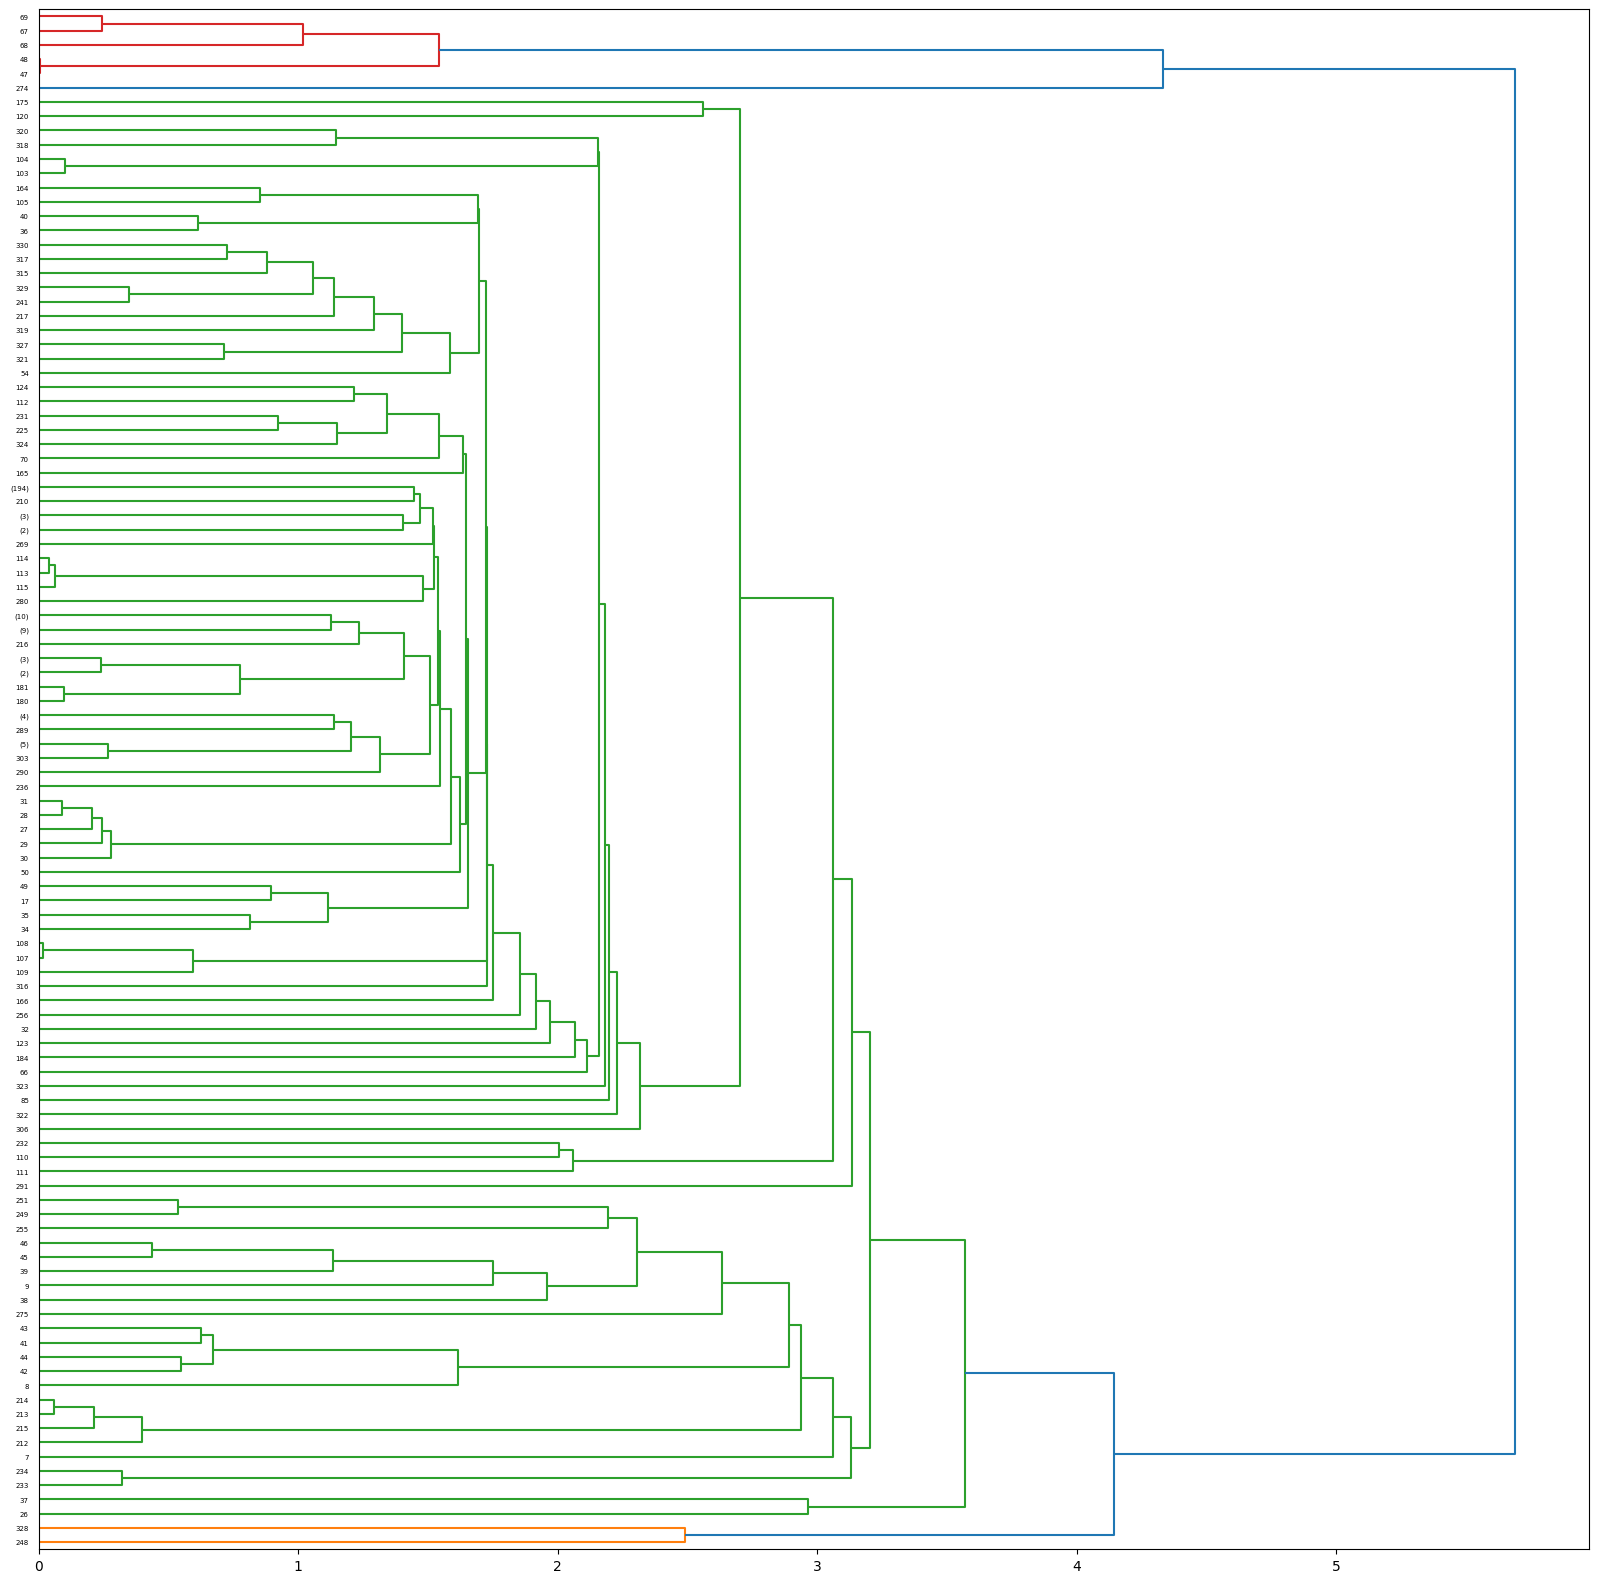

In [189]:
# Membuat dendrogram dengan pendekatan single linkage
cl_mergings_single = linkage(scores_pca, method='single', metric='euclidean')

# Menggambar dendrogram
plt.figure(figsize=(20, 20))  # Ukuran gambar disesuaikan dengan kebutuhan
dendrogram(cl_mergings_single, orientation='right', truncate_mode='level', p=30)

# Menampilkan plot
plt.show()

In [190]:
scores_pca_cleaned = np.delete(scores_pca, (248, 328, 26, 37, 274), axis=0)

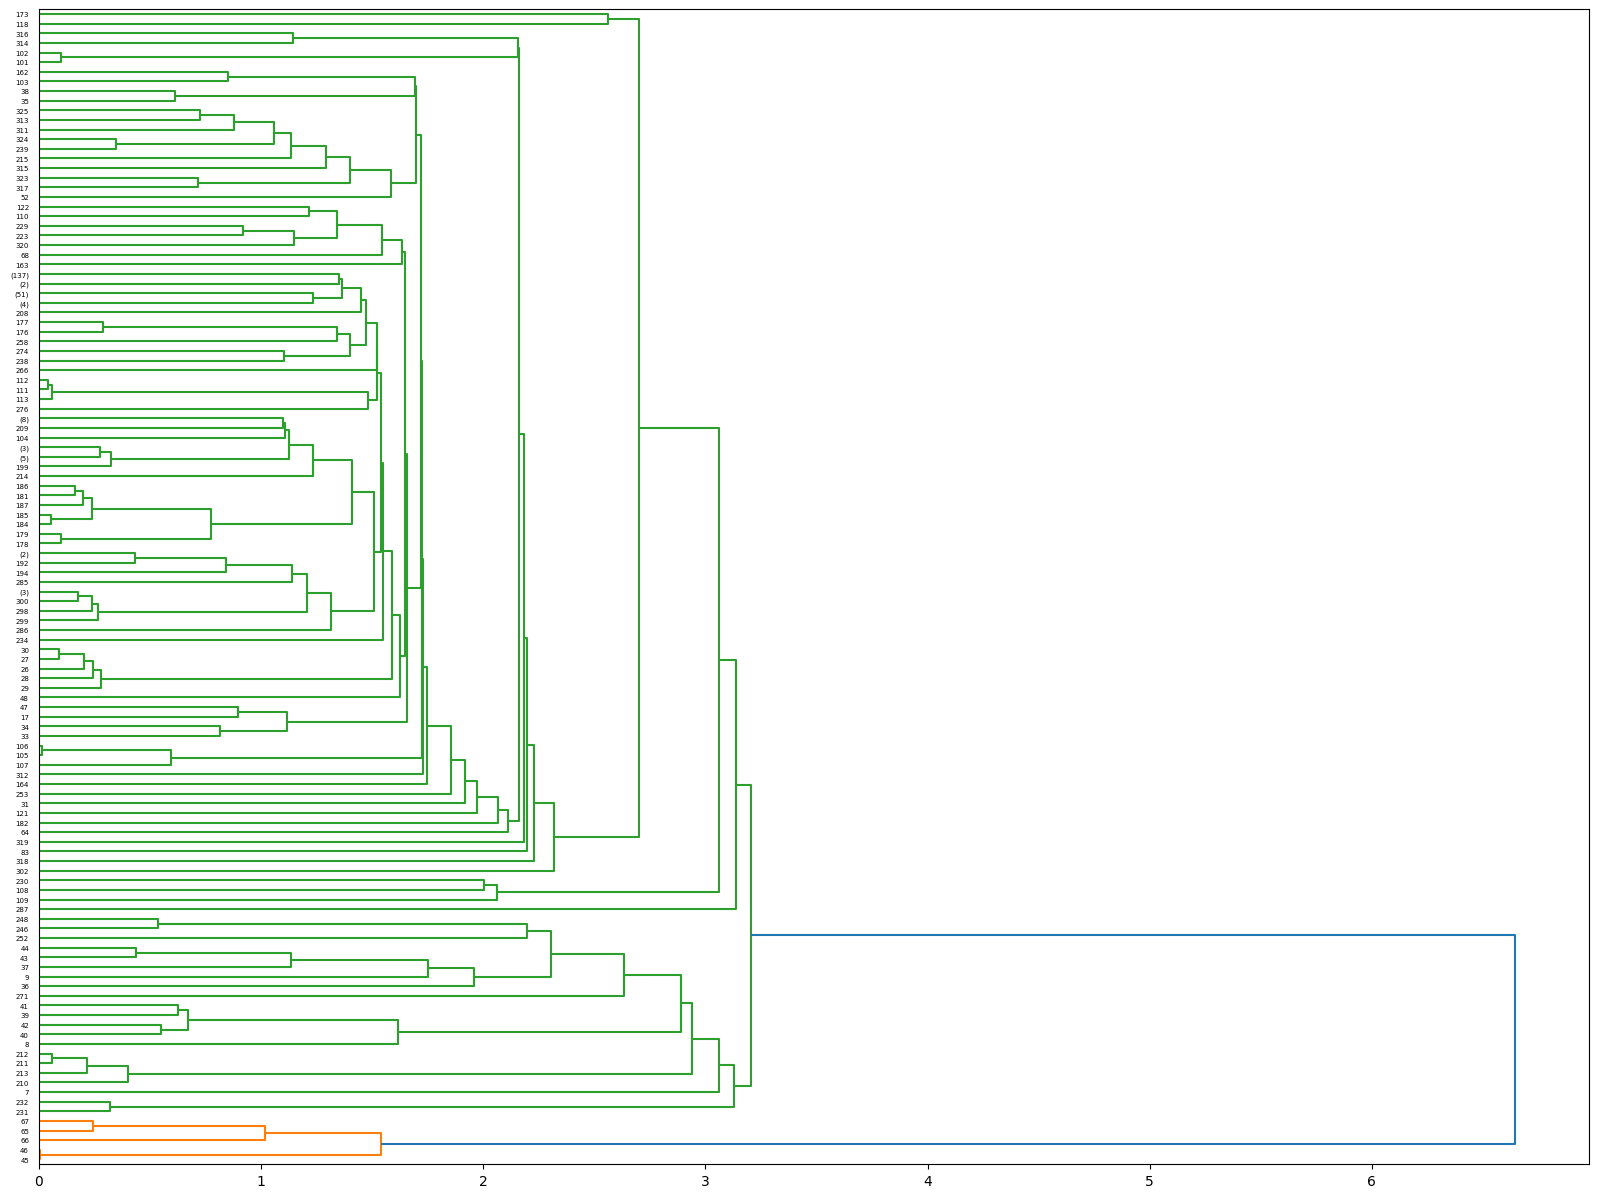

In [191]:
# Membuat dendrogram dengan pendekatan single linkage
cl_mergings_single = linkage(scores_pca_cleaned, method='single', metric='euclidean')

# Menggambar dendrogram
plt.figure(figsize=(20, 15))  # Ukuran gambar disesuaikan dengan kebutuhan
dendrogram(cl_mergings_single, orientation='right', truncate_mode='level', p=30)

# Menampilkan plot
plt.show()

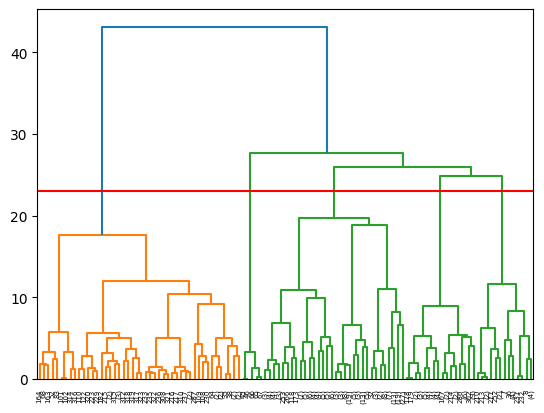

In [192]:
cl_mergings = linkage(scores_pca_cleaned, method='ward', metric="euclidean")

# Menggambar dendrogram
dendrogram(cl_mergings, truncate_mode='level', p = 7)

# Menambahkan garis horizontal untuk tingkat pemotongan
plt.axhline(y=23, color='r', linestyle='-')

# Menampilkan plot
plt.show()

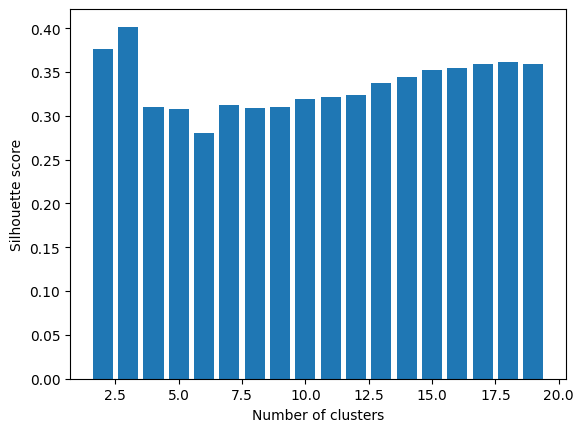

In [193]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 20):
    silhouette_scores.append(silhouette_score(scores_pca_cleaned, AgglomerativeClustering(n_clusters=n_cluster).fit_predict(scores_pca_cleaned)))

plt.bar(range(2, 20), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [196]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(scores_pca_cleaned)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 4, 4, 4, 1, 1,
       1, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 1, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 3, 3, 3, 3, 4, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 3, 3, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4,

In [198]:
dt2 = dt.drop(columns=['Unnamed: 0', 'property_bedrooms'])
df_clust_pca = pd.concat([dt2, pd.DataFrame(scores_pca_cleaned)], axis = 1)
df_clust_pca.columns.values[-7:] = ["comp1", "comp2", "comp3", "comp4", "comp5", "comp6", 'comp7']
df_clust_pca

,area_name,property_id,property_name,property_type,unit_id,unit_name,unit_type,bedroom,bathroom,beds,...,price_per_unit,total_bookings,overall_rating,comp1,comp2,comp3,comp4,comp5,comp6,comp7
0,Bingin,PR0057,Teges Asri,Guesthouse,UN1395,Room 1,Standard,1.0,1.0,1.0,...,1.170735e+06,138.0,4.702576,-0.918151,-0.127895,-1.335285,-0.899123,-0.548432,-0.917613,-0.368901
1,Bingin,PR0057,Teges Asri,Guesthouse,UN1396,Room 2,Standard,1.0,1.0,1.0,...,1.201892e+06,143.0,4.824885,-0.910643,-0.238324,-1.556020,-0.695883,-0.423107,-0.868681,-0.742645
2,Bingin,PR0057,Teges Asri,Guesthouse,UN1397,Room 3,Standard,1.0,1.0,1.0,...,1.237458e+06,147.0,4.674419,-0.789028,-0.734944,-1.283599,-0.083064,0.399883,-0.773531,0.640651
3,Bingin,PR0057,Teges Asri,Guesthouse,UN1398,Room 4,Standard,1.0,1.0,1.0,...,1.195869e+06,130.0,4.810275,-0.912828,-0.225145,-1.529773,-0.719932,-0.438126,-0.873745,-0.698322
4,Bingin,PR0057,Teges Asri,Guesthouse,UN1399,Room 5,Standard,1.0,1.0,1.0,...,1.189912e+06,130.0,4.794189,-0.914856,-0.210633,-1.500841,-0.746478,-0.454648,-0.879549,-0.649428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Ungasan,PR0765,Istana Dalton,Villa,UN2884,Istana Dalton - Entire Villa,Entire Villa,2.0,2.0,2.0,...,1.160921e+06,86.0,4.757937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,Ungasan,PR0093,Villa Istana Willy,Villa,UN1223,Istana Willy - Entire Villa,Villa Istana Willy,2.0,2.0,3.0,...,1.185920e+06,52.0,4.559767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,Ungasan,PR0557,Blumaya,Villa,UN2786,Villa 1,Villa Blumaya,4.0,4.0,4.0,...,1.941470e+06,148.0,4.756757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,Ungasan,PR0417,NH Residence,Villa,UN2355,NH Residence 3A,3BR Villa 3A,3.0,3.0,3.0,...,1.456936e+06,91.0,4.423888,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
df_clust_pca = df_clust_pca.dropna(subset=['comp4'])

In [201]:
df_clust_pca['cluster'] = pd.DataFrame(y_hc)
df_clust_pca

,area_name,property_id,property_name,property_type,unit_id,unit_name,unit_type,bedroom,bathroom,beds,...,total_bookings,overall_rating,comp1,comp2,comp3,comp4,comp5,comp6,comp7,cluster
0,Bingin,PR0057,Teges Asri,Guesthouse,UN1395,Room 1,Standard,1.0,1.0,1.0,...,138.0,4.702576,-0.918151,-0.127895,-1.335285,-0.899123,-0.548432,-0.917613,-0.368901,0
1,Bingin,PR0057,Teges Asri,Guesthouse,UN1396,Room 2,Standard,1.0,1.0,1.0,...,143.0,4.824885,-0.910643,-0.238324,-1.556020,-0.695883,-0.423107,-0.868681,-0.742645,0
2,Bingin,PR0057,Teges Asri,Guesthouse,UN1397,Room 3,Standard,1.0,1.0,1.0,...,147.0,4.674419,-0.789028,-0.734944,-1.283599,-0.083064,0.399883,-0.773531,0.640651,0
3,Bingin,PR0057,Teges Asri,Guesthouse,UN1398,Room 4,Standard,1.0,1.0,1.0,...,130.0,4.810275,-0.912828,-0.225145,-1.529773,-0.719932,-0.438126,-0.873745,-0.698322,0
4,Bingin,PR0057,Teges Asri,Guesthouse,UN1399,Room 5,Standard,1.0,1.0,1.0,...,130.0,4.794189,-0.914856,-0.210633,-1.500841,-0.746478,-0.454648,-0.879549,-0.649428,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Ungasan,PR0787,Pondok Utari,Villa,UN2995,Entire,Pondok Utari,2.0,2.0,2.0,...,79.0,4.607143,3.092991,-1.396908,-0.024440,1.255109,0.609540,0.876448,-0.031254,1
322,Ungasan,PR0695,Villa Angin,Villa,UN2761,Villa 1,Villa Angin,2.0,3.0,2.0,...,97.0,4.310440,2.441205,-1.249254,0.223376,1.085192,0.410461,1.197028,0.329804,1
323,Ungasan,PR0432,Villa Kyl 2BR,Villa,UN2262,Entire,Entire,2.0,3.0,2.0,...,174.0,4.555665,2.994808,-0.442884,0.539346,-0.218122,-0.859108,0.958039,-0.159837,1
324,Ungasan,PR0851,Casa Aimia,Villa,UN3081,Entire,Entire Villa,3.0,3.0,3.0,...,14.0,4.964286,4.343314,-0.283920,0.736036,-0.632501,-1.093203,0.896797,-0.098565,1


In [203]:
df_clust_pca1 = df_clust_pca.iloc[ :, -8:-1]
df_clust_pca1

,comp1,comp2,comp3,comp4,comp5,comp6,comp7
0,-0.918151,-0.127895,-1.335285,-0.899123,-0.548432,-0.917613,-0.368901
1,-0.910643,-0.238324,-1.556020,-0.695883,-0.423107,-0.868681,-0.742645
2,-0.789028,-0.734944,-1.283599,-0.083064,0.399883,-0.773531,0.640651
3,-0.912828,-0.225145,-1.529773,-0.719932,-0.438126,-0.873745,-0.698322
4,-0.914856,-0.210633,-1.500841,-0.746478,-0.454648,-0.879549,-0.649428
...,...,...,...,...,...,...,...
321,3.092991,-1.396908,-0.024440,1.255109,0.609540,0.876448,-0.031254
322,2.441205,-1.249254,0.223376,1.085192,0.410461,1.197028,0.329804
323,2.994808,-0.442884,0.539346,-0.218122,-0.859108,0.958039,-0.159837
324,4.343314,-0.283920,0.736036,-0.632501,-1.093203,0.896797,-0.098565


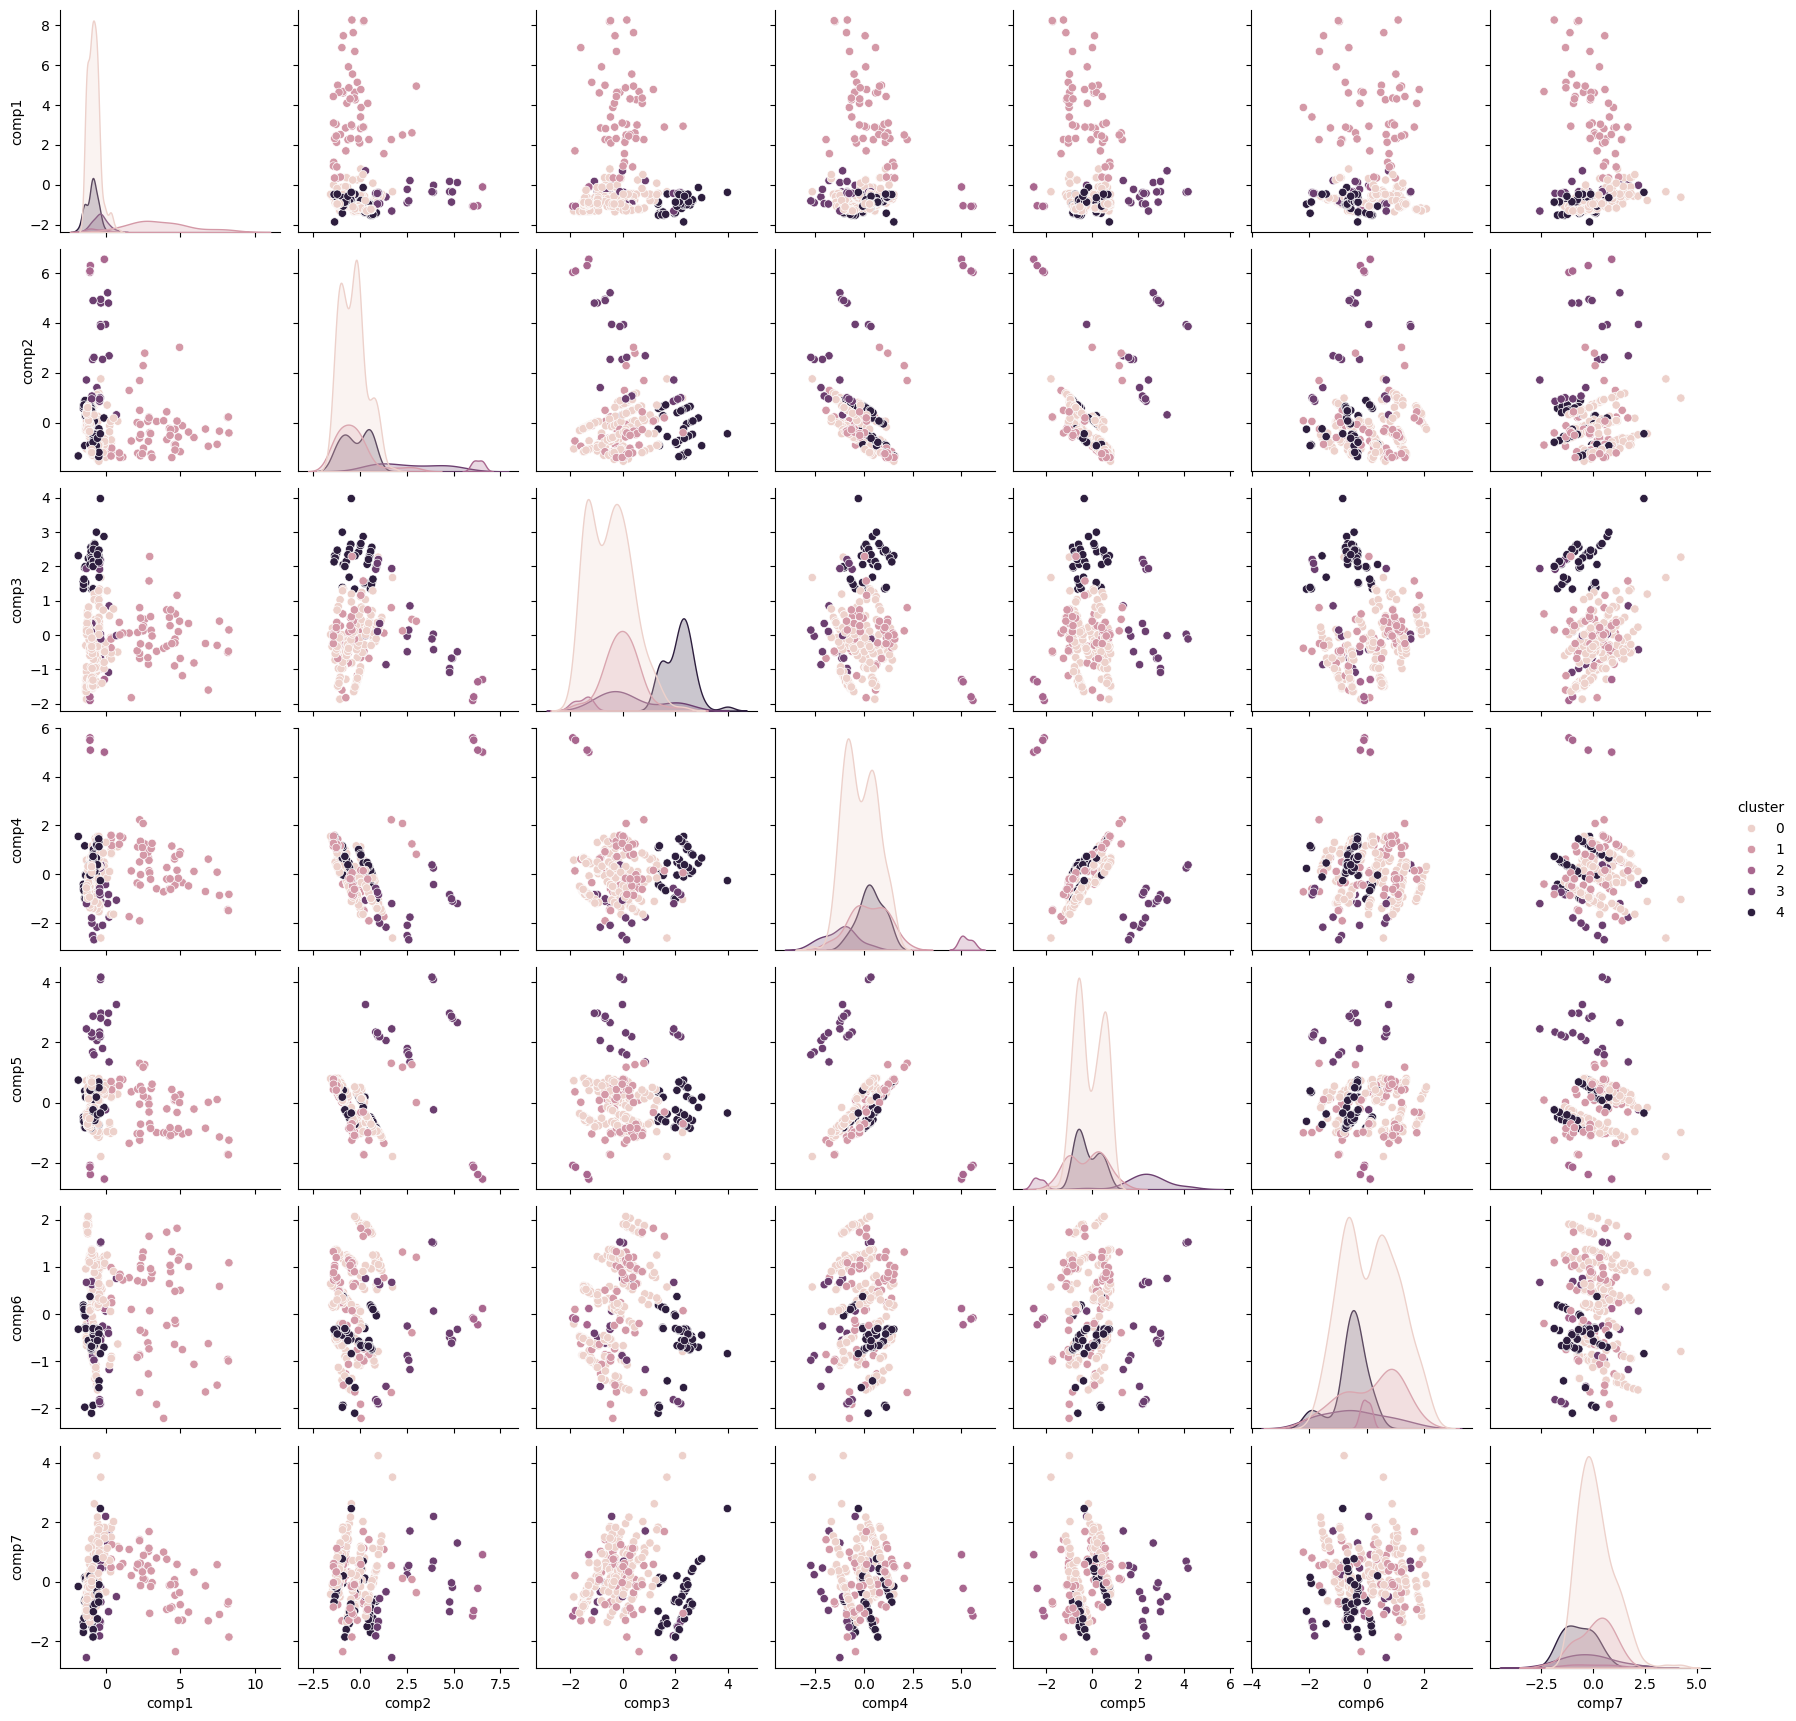

In [204]:
df_clust_pca1['cluster'] = df_clust_pca['cluster']
sns.pairplot(df_clust_pca1[0:], hue='cluster')

### Transpose PCA

In [205]:
pc = np.transpose(scores_pca_cleaned)

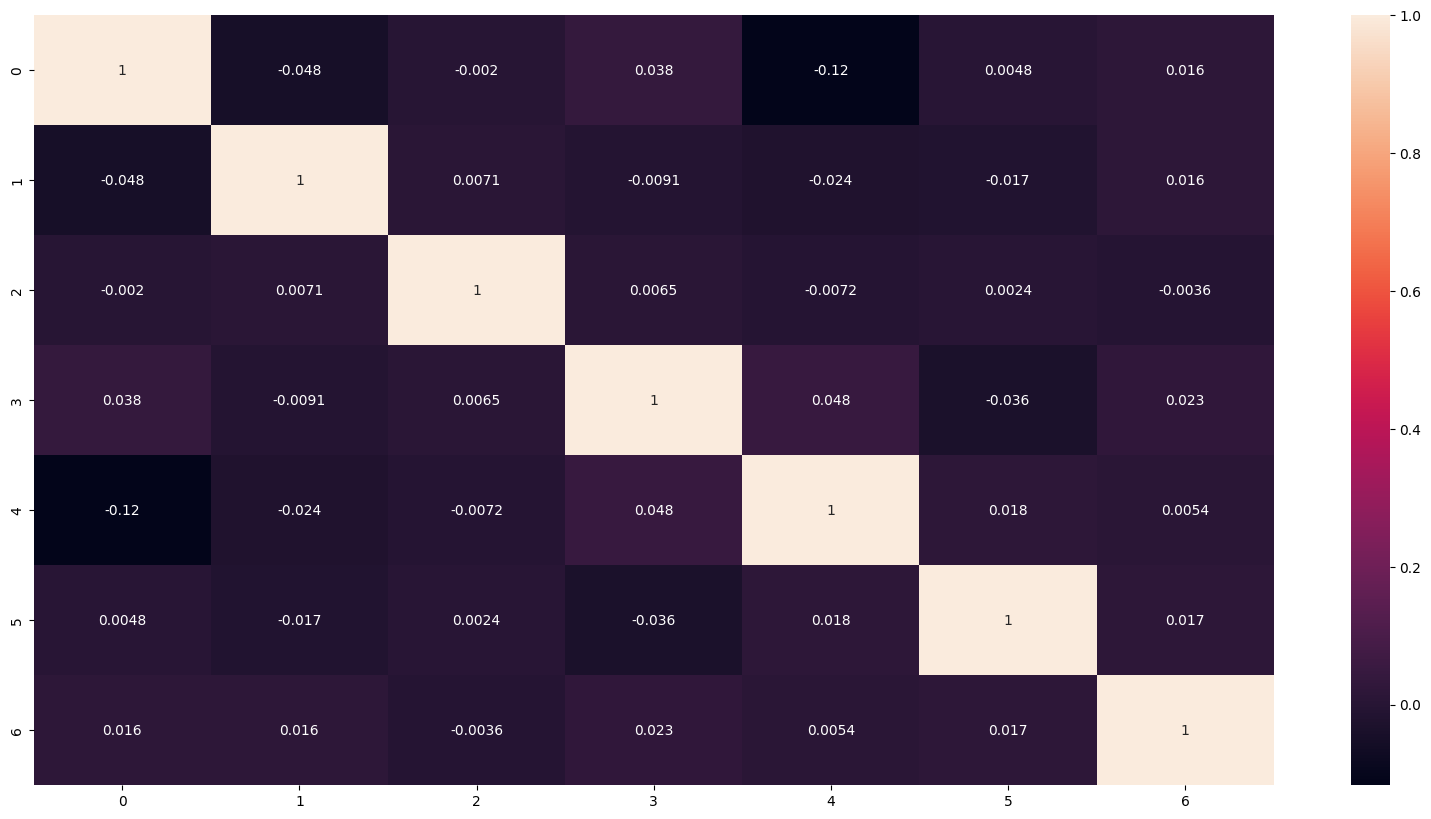

In [206]:
corrmat = np.corrcoef(pc)
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [207]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4], 'P6':pc[5], 'P7':pc[6]})

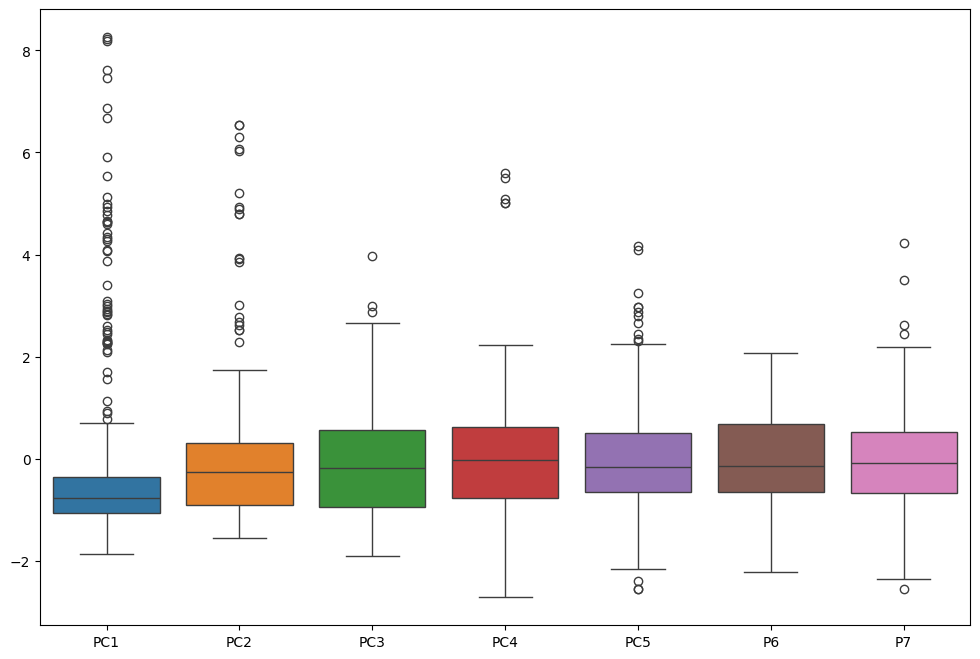

In [208]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [209]:
pcs_df2.shape

(326, 7)

In [210]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,P6,P7
0,-0.918151,-0.127895,-1.335285,-0.899123,-0.548432,-0.917613,-0.368901
1,-0.910643,-0.238324,-1.556020,-0.695883,-0.423107,-0.868681,-0.742645
2,-0.789028,-0.734944,-1.283599,-0.083064,0.399883,-0.773531,0.640651
3,-0.912828,-0.225145,-1.529773,-0.719932,-0.438126,-0.873745,-0.698322
4,-0.914856,-0.210633,-1.500841,-0.746478,-0.454648,-0.879549,-0.649428


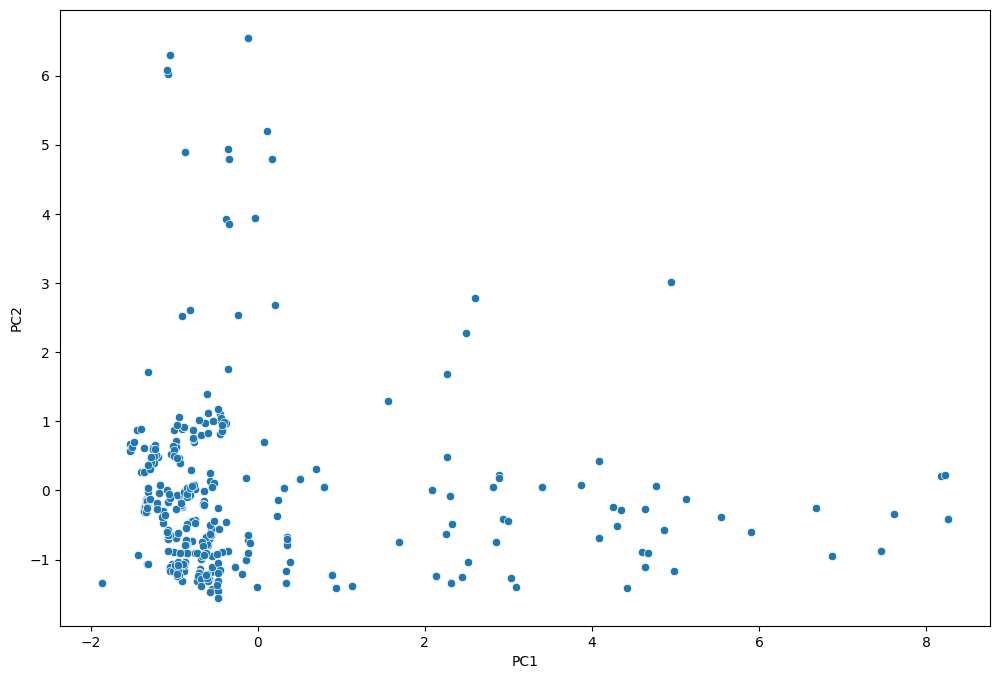

In [211]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()